In [70]:
!pip install quantecon

    100% |████████████████████████████████| 112kB 4.2MB/s ta 0:00:01
  Running setup.py bdist_wheel for quantecon ... done
  Stored in directory: /Users/hbeard/Library/Caches/pip/wheels/0c/e2/34/ddd3bc52f9fd42b3ad88432cdeabe74ee59c225b8e7b8b4093
Successfully built quantecon


In [2]:
import numpy as np
from numpy.linalg import matrix_power
from scipy.stats import norm, gaussian_kde, beta
import scipy.linalg as la
import matplotlib
import matplotlib.pyplot as plt
from numba import vectorize, jit, njit, float64, prange

## Exercise 1.1. {-}

Let $X$ be an $n\times n$ matrix with all positive entries. The spectral radius $r(X)$ of $X$ is the maximum of $\left|\lambda\right|$ over all eigenvalues $\lambda$ of $X$ where $\left|\cdot\right|$ is the modulus of a complex number.

A version of the local spectral radius theorem states that if $X$ has all positive entries and $v$ is any strictly positive $n\times1$ vector, then 
$$
\lim_{i\to\infty}\Vert X^{i}v \Vert^{1/i}\to r(X)\qquad(\mathrm{LSR})
$$
where $\Vert \cdot \Vert$ is the usual Euclidean norm.

Intuitively, the norm of the iterates of a positive vector scale like $r(X)$ asymptotically.

The data file $\mathtt{matrix}\_\mathtt{data.txt}$ contains the data for a single matrix $X$.

1. Read it in and compute the spectral radius using the tools for working with eigenvalues in $\mathtt{scipy.linalg}$.

2. Test the claim in (LSR) iteratively, computing $\Vert X^{i}v \Vert^{1/i}$ for successively larger values of $i$. See if the sequence so generated converges to $r(A)$.

In [6]:
matrix = np.loadtxt("matrix_data.txt")
λ = la.eigvals(matrix)
spectral_radius = np.absolute(λ).max()

In [7]:
def problem1_1(v, X, i):
    r = la.norm(matrix_power(X, i) @ v) ** (1/i)
    distance = np.absolute(r - spectral_radius)
    return r, distance

j, jj = matrix.shape
v = np.ones(j)

In [8]:
i = 1000
r, distance = problem1_1(v, matrix, i)
print(distance)

0.0012011304694321545


In [9]:
i = 100000
r, distance = problem1_1(v, matrix, i)
print(distance)

1.200420037306138e-05


## Exercise 1.2. {-}

Recall the the quadratic map generates time series of the form
$$
x_{t+1}=4x_{t}(1-x_{t})
$$
for some given $x_{0}$, and that these trajectories are chaotic.

This means that different initial conditions generate seemingly very different outcomes.

Nevertheless, the regions of the state space where these trajectories spend most of their time are in fact typically invariant to the initial condition.

Illustrate this by generating 100 histograms of the time series generated from the quadratic map, with $x_{0}$
  drawn independently form the uniform distribution on $(0,1)$.

Do they all look alike?

Try to make your code efficient.

In [10]:
@njit
def problem1_2(x_0, length):
    x = x_0
    for t in range(length-1):
        x = 4*x*(1-x)
    return x

In [11]:
print(problem1_2(0.4,10))

0.918969052370147


CPU times: user 2.04 s, sys: 10.6 ms, total: 2.05 s
Wall time: 2.08 s


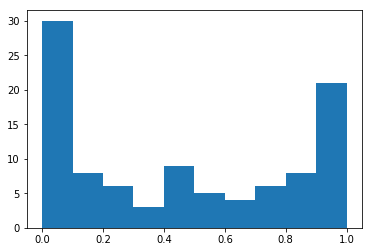

In [12]:
%%time
length = 10000000
xknot = np.random.rand(100)
out = np.empty(xknot.size)

for i,x_0 in enumerate(xknot):
    out[i] = problem1_2(x_0, length = length)
    
plt.hist(out)

## Exercise 1.3. {-}

In the lecture it was claimed that, if $\left(\mathbb{X},g\right)$ is a dynamical system, $g$ continuous at $\hat{x}\in\mathbb{X}$, and for some $x\in\mathbb{X}$, $g^{t}(x)\to\hat{x}$, then $\hat{x}$ is a steady state of $\left(\mathbb{X},g\right)$. Prove this.

#### Solution. {-}
Let $y\in C = \left\{ x \in \mathbb{X} \mid \lim_{t\to\infty} g^t (x) = \hat{x} \right\}$. Since $g$ is continuous at $\hat{x}$, and $\lim_{t\to\infty} g^{t-1} (y) = \hat{x}$, we have that
$$
\begin{eqnarray*}
\hat{x}&=&\lim_{t\to\infty} g^t (x) \\
&=& g\left( \lim_{t\to\infty}g^{t-1}(x)\right) \\
&=&g\left(\hat x\right). 
\end{eqnarray*}
$$
$\blacksquare$

## Exercise 2.1. {-}

In [16]:
class problem2_1:
    
    def __init__(self, X, h=None):
        
        self.X = X
        self.n = X.size
        
        if not h:
            self.h = self.silverman()
        else:
            self.h = h
            
    def f(self, x):
        summand = norm.pdf( (x - self.X) / self.h )
        return (1/(self.h*self.n)) * summand.sum()
    
    def estimate(self, grid=np.linspace(0,1,1000)):
        estimation = np.empty_like(grid)
        for i in range(len(grid)):
            estimation[i] = self.f(grid[i])
            
        return estimation
    
    def silverman(self):
        return 1.06 * (self.n ** (-1/5)) * np.sqrt(np.var(self.X))
    


In [18]:
n, grid = 1000, np.linspace(0,1,1000)

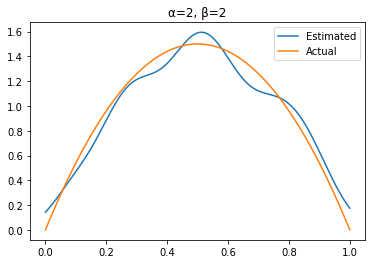

In [24]:
α2β2 = np.random.beta(2,2,size=(n,1))
estimator_α2β2 = problem2_1(X = α2β2)
estimate_α2β2 = estimator_α2β2.estimate(grid=grid)
plt.plot(grid, estimate_α2β2, label = "Estimated")
plt.plot(grid, beta.pdf(grid,2,2),label = "Actual")
plt.title("α=2, β=2")
plt.legend()
plt.show()

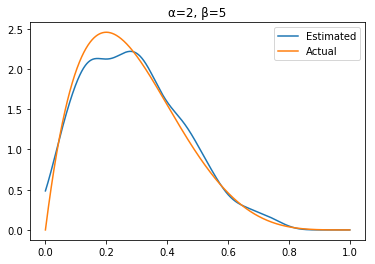

In [25]:
α2β5 = np.random.beta(2,5,size=(n,1))
estimator_α2β5 = problem2_1(X=α2β5)
estimate_α2β5 = estimator_α2β5.estimate(grid=grid)
plt.plot(grid, estimate_α2β5, label="Estimated")
plt.plot(grid, beta.pdf(grid,2,5), label= "Actual")
plt.title("α=2, β=5")
plt.legend()
plt.show()

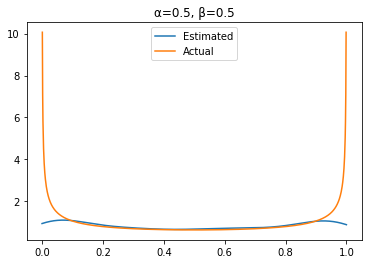

In [26]:
α05β05 = np.random.beta(0.5,0.5,size=(n,1))
estimator_α05β05 = problem2_1(X=α05β05)
estimate_α05β05 = estimator_α05β05.estimate(grid=grid)
plt.plot(grid, estimate_α05β05, label="Estimated")
plt.plot(grid, beta.pdf(grid,0.5,0.5), label="Actual")
plt.title("α=0.5, β=0.5")
plt.legend()
plt.show()

## Exercise 2.2. {-}

In [27]:
ρ, b, σ, μ, s = 0.9, 0.0, 0.1, -3, 0.2

In [54]:
def problem2_2_1(x, ρ=ρ, b=b, σ=σ):
    ξ = np.random.standard_normal()
    return (ρ * x) + b + (σ * ξ)

In [55]:
import scipy
def problem2_2_2():
    plt.plot(np.linspace(μ - 3*s, μ+3*s), scipy.stats.norm.pdf(np.linspace(μ - 3*s, μ+3*s), loc=μ, scale=s**2))
    plt.plot(np.linspace(ρ*μ + b - 3*s, ρ*μ + b + 3*s), scipy.stats.norm.pdf(np.linspace(ρ*μ + b - 3*s, ρ*μ + b + 3*s), loc = ρ*μ + b, scale = (ρ**2)*(s**2) + (σ**2)))
    plt.title(r"$\psi_t$ and $\psi_{t+1}$")
    plt.plot()

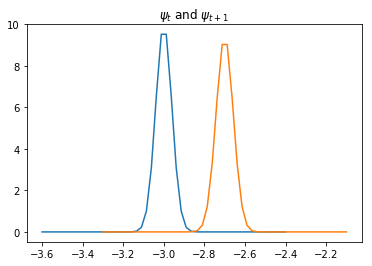

In [56]:
problem2_2_2()

In [61]:
def problem2_2_3():
    for n in [10,100,1000,10000]:
        dist = problem2_2_1(np.random.normal(μ, s**2, n))
        estimator = problem2_1(dist)

        grid = np.linspace(-3.2,-2.4,n)
        density = estimator.estimate(grid=grid)
        plt.plot(grid,density,label=r"$n=${}".format(n))

    plt.legend()
    plt.title(r"Convergence of simulation based on $\hat{\psi}_{t+1}$ for different values of $n$")
    plt.plot()

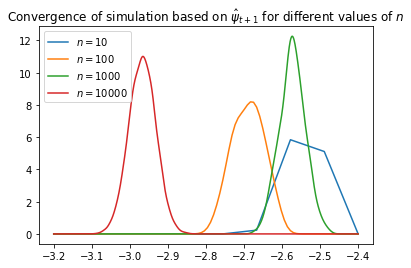

In [62]:
problem2_2_3()

## Exercise 2.3. {-}

In the lecture it was claimed that, for $n\times n$ matrix $A$, we have 
$$
r(A)<1\implies A^{k}\to0
$$
where convergence is in terms of the spectral norm.

Prove this using Gelfand's formula.

#### Solution. {-}
Let $A\in M_{n\times n}$, and let $A$ have spectral radius $r(A)<1$. Consider arbitrary $\varepsilon$ such that $0<\varepsilon<1-r(A)$. 

By Gelfand's formula, $\exists K(\varepsilon)\in\mathbb{N}:\forall k\geq K(\varepsilon)$:
$$
\begin{eqnarray*}
(r(A)-\varepsilon)^{k} &<& \Vert A^{k} \Vert \\
&<& (r(A)+\varepsilon)^{k}.
\end{eqnarray*}
$$
Remember that $\Vert A^{k} \Vert \geq 0$, so
$$
\begin{eqnarray*}
0 &<& \Vert A^{k} \Vert \\
&<& (r(A)+\varepsilon)^{k}.
\end{eqnarray*}
$$
Since $\varepsilon$ arbitrary, it follows that 
$$
\lim_{k\to\infty} (r(A)+\varepsilon)^{k}=0.
$$
Thus, 
$$
\lim_{k\to\infty} \Vert A^k \Vert = 0.
$$

$\blacksquare$

## Exercise 3.1. {-}

In [71]:
import numpy as np
import quantecon as qe
import matplotlib.pyplot as plt

In [72]:
P = [[0.222, 0.222, 0.215, 0.187, 0.081, 0.038, 0.029, 0.006],
     [0.221, 0.220, 0.215, 0.188, 0.082, 0.039, 0.029, 0.006],
     [0.207, 0.209, 0.210, 0.194, 0.090, 0.046, 0.036, 0.008],
     [0.198, 0.201, 0.207, 0.198, 0.095, 0.052, 0.040, 0.009],
     [0.175, 0.178, 0.197, 0.207, 0.110, 0.067, 0.054, 0.012],
     [0.182, 0.184, 0.200, 0.205, 0.106, 0.062, 0.050, 0.011],
     [0.123, 0.125, 0.166, 0.216, 0.141, 0.114, 0.094, 0.021],
     [0.084, 0.084, 0.142, 0.228, 0.170, 0.143, 0.121, 0.028]]

Compute and plot the stationary distribution of the matrix using one of the methods in $\mathtt{quantecon}$'s $\mathtt{MarkovChain}$ object, combined with $\mathtt{matplotlib}$.

In [212]:
def problem3_1():
    mc = qe.markov.core.MarkovChain(P)
    stdist = qe.markov.core.mc_compute_stationary(mc.P)
    plt.bar(range(0,8),stdist[0])
    plt.ylabel("Prob")
    plt.title(r"Stationary distribution of $P$")
    plt.plot()

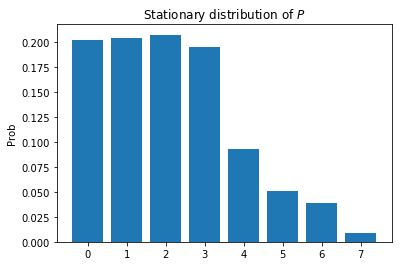

In [213]:
problem3_1()

## Exercise 3.2. {-}

The Markov chain is asymptotically stationary and ergodic, which means that, for any sample path $\{ X_t \}$ generated according to $P$, we have
$$
\lim_{n\to\infty} \frac 1 n \sum _{t=1} ^{n} \mathbb{1} \{ X_t = j \} = \psi (j),
$$
where $\psi$ is the stationary distribution and $j$ is an integer between $0$ and $7$ (the set of possible states).

Use this fact to compute an approximation to the stationary distribution $\psi$. Confirm visually that your result is similar to the stationary distribution you computed in exercise 1.

You can make use of the $\mathtt{simulate}$ method in $\mathtt{MarkovChain}$.

In [324]:
def problem3_2():
    mc, probs = qe.markov.core.MarkovChain(P), []
    for i in range(mc.P.shape[0]):
        probs.append((mc.simulate_indices(ts_length=100000) == i).sum() / 100000)
    plt.bar(range(0,8),np.array(probs))
    plt.title(r"Simulated stationary distribution of $P$")
    plt.show()

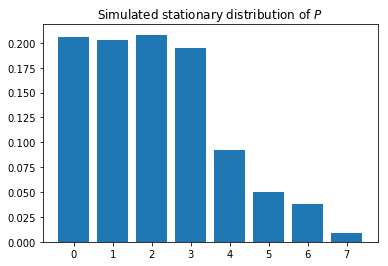

In [325]:
problem3_2()

## Exercise 3.3. {-}

Ergodicity also implies that, if we simulate a large number of paths and then look at the cross section at some $T$, where $T$ is suitably large, then the empirical distribution should be close to the stationary distribution.

Confirm this by simulation and visual inspection, as above.

(In this context, the empirical distribution of a sampleis the fraction of observations that take value $j$ for each $j\in \{0,\ldots,7\}$.

In [338]:
def problem3_3():
    mc, probs = qe.markov.core.MarkovChain(P), []
    for i in range(10000):
        path = mc.simulate_indices(ts_length=10000)
    for i in range(mc.P.shape[0]):
        probs.append((path == i).sum() / 10000)
    plt.bar(range(0,8),np.array(probs))
    plt.title(r"Simulated stationary distribution of $P$")
    plt.show()

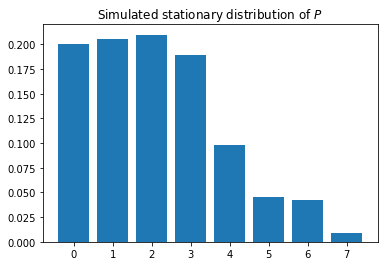

In [339]:
problem3_3()